In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
X = np.array([127.4, 364.4, 150, 128.7, 285.9, 200, 303.3, 315.7, 169.8, 104.9, 
              297.7, 256.4, 249.1, 323.1, 223, 235, 200])
Y = np.array([10.5, 21.4, 10, 9.6, 17.4, 12.5, 20, 21, 14.7, 10.1, 21.5, 
              16.6, 17.1, 20.7, 15.5, 13.5, 12.5])

# Calculate the means of X and Y
X_mean = np.mean(X)
Y_mean = np.mean(Y)

# Calculate the values for b1 and b0 using the formulas
N = len(X)
numerator = np.sum((X - X_mean) * (Y - Y_mean))
denominator = np.sum((X - X_mean) ** 2)
b1 = numerator / denominator
b0 = Y_mean - b1 * X_mean

print(f"Initial values: b0 = {b0}, b1 = {b1}")


Initial values: b0 = 3.3524968264935993, b1 = 0.05276727174400388


Iteration 0: Cost 1.6924014750774847, b0 3.3524968264935993, b1 0.05276727174400383
Iteration 1: Cost 1.692401475077486, b0 3.3524968264935993, b1 0.052767271744004064
Iteration 2: Cost 1.6924014750774854, b0 3.3524968264935993, b1 0.0527672717440029
Iteration 3: Cost 1.6924014750774843, b0 3.3524968264935993, b1 0.05276727174400865
Iteration 4: Cost 1.6924014750774847, b0 3.3524968264935993, b1 0.05276727174398032
Iteration 5: Cost 1.6924014750774845, b0 3.3524968264935997, b1 0.05276727174411982
Iteration 6: Cost 1.6924014750774852, b0 3.352496826493597, b1 0.05276727174343291
Iteration 7: Cost 1.6924014750774847, b0 3.3524968264936104, b1 0.05276727174681532
Iteration 8: Cost 1.692401475077486, b0 3.352496826493545, b1 0.052767271730160034
Iteration 9: Cost 1.6924014750774854, b0 3.3524968264938653, b1 0.05276727181217206
Optimal parameters after gradient descent: b0 = 3.3524968264938653, b1 = 0.05276727181217206


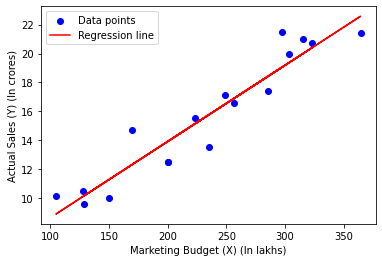

In [7]:
# Define the cost function
def compute_cost(X, Y, b0, b1):
    m = len(Y)
    cost = np.sum((b0 + b1 * X - Y) ** 2) / ( m)
    return cost

# Implement gradient descent
def gradient_descent(X, Y, b0, b1, learning_rate, num_iterations):
    m = len(Y)
    cost_history = []

    for i in range(num_iterations):
        b0_gradient = np.sum(b0 + b1 * X - Y) / m
        b1_gradient = np.sum((b0 + b1 * X - Y) * X) / m
        b0 = b0 - learning_rate * b0_gradient
        b1 = b1 - learning_rate * b1_gradient
        
        cost = compute_cost(X, Y, b0, b1)
        cost_history.append(cost)
        

        print(f"Iteration {i}: Cost {cost}, b0 {b0}, b1 {b1}")
    
    return b0, b1, cost_history

# Perform gradient descent to refine the parameters
learning_rate = 0.0001
num_iterations = 10
b0_optimal, b1_optimal, cost_history = gradient_descent(X, Y, b0, b1, learning_rate, num_iterations)

# Print the optimal parameters
print(f"Optimal parameters after gradient descent: b0 = {b0_optimal}, b1 = {b1_optimal}")

# Plot the results
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, b0_optimal + b1_optimal * X, color='red', label='Regression line')
plt.xlabel('Marketing Budget (X) (In lakhs)')
plt.ylabel('Actual Sales (Y) (In crores)')
plt.legend()
plt.show()


Optimal parameters using scikit-learn: b0 = 3.3524968264935975, b1 = 0.052767271744003884


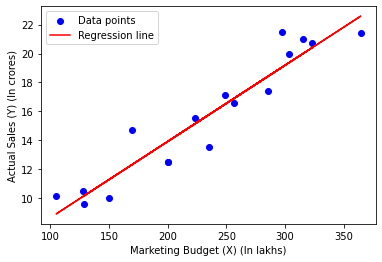

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Define the dataset
X = np.array([127.4, 364.4, 150, 128.7, 285.9, 200, 303.3, 315.7, 169.8, 104.9, 
              297.7, 256.4, 249.1, 323.1, 223, 235, 200]).reshape(-1, 1)
Y = np.array([10.5, 21.4, 10, 9.6, 17.4, 12.5, 20, 21, 14.7, 10.1, 21.5, 
              16.6, 17.1, 20.7, 15.5, 13.5, 12.5])

# Step 2: Create and train the model
model = LinearRegression()
model.fit(X, Y)

# Step 3: Retrieve the coefficients
b0_optimal = model.intercept_
b1_optimal = model.coef_[0]

print(f"Optimal parameters using scikit-learn: b0 = {b0_optimal}, b1 = {b1_optimal}")

# Step 4: Plot the results
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, b0_optimal + b1_optimal * X, color='red', label='Regression line')
plt.xlabel('Marketing Budget (X) (In lakhs)')
plt.ylabel('Actual Sales (Y) (In crores)')
plt.legend()
plt.show()
